### Step 1: Importing Required Libraries

We begin by importing essential Python libraries for data manipulation (`pandas`) and visualization (`matplotlib`, `seaborn`).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Step 2: Loading the Raw Dataset

We load the original air pollution dataset using an appropriate text encoding to avoid misinterpreted characters.

In [ ]:
file_path = "global_air_pollution.csv"
df = pd.read_csv(file_path, encoding='latin-1')  # Alternatives: ISO-8859-1, cp1252
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


### Step 3: Understanding the Dataset

We inspect the dataset's structure, data types, and missing values to guide the cleaning steps.

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


### Step 4: Data Cleaning

We clean the dataset by:
- Dropping rows where the `Country` is missing (critical identifier).
- Replacing missing `City` values with `'Unknown'`.
- Converting AQI-related columns to numeric values.

In [ ]:
df = df.dropna(subset=['Country'])
df['City'] = df['City'].fillna('Unknown')

numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.isnull().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


### Step 5: Save Cleaned Dataset

We export the cleaned dataset for use in the interactive dashboard.

In [ ]:
df.to_csv('cleaned_global_air_pollution.csv', index=False)

### Step 6: Summary Statistics

We generate basic descriptive statistics to understand distributions and ranges of AQI and pollutant levels.

In [ ]:
df[numeric_columns].describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23036.000000,23036.000000,23036.000000,23036.000000,23036.000000
mean,72.344504,1.376237,35.234459,3.084780,68.883443
std,56.359776,1.844887,28.236125,5.281597,55.056202
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


### Step 7: Correlation Between Pollutants

We explore relationships between pollutant-specific AQI values to identify possible multicollinearity or patterns.

In [ ]:
df[numeric_columns].corr()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.429643,0.405083,0.230845,0.984518
CO AQI Value,0.429643,1.000000,0.144833,0.487624,0.437751
Ozone AQI Value,0.405083,0.144833,1.000000,-0.182930,0.340486
NO2 AQI Value,0.230845,0.487624,-0.182930,1.000000,0.259084
PM2.5 AQI Value,0.984518,0.437751,0.340486,0.259084,1.000000


### Step 8: AQI Category Distribution

We examine how many entries fall under each AQI category (e.g., Good, Moderate, Unhealthy).

In [ ]:
df['AQI Category'].value_counts()

,count
AQI Category,
Good,9688
Moderate,9088
Unhealthy,2215
Unhealthy for Sensitive Groups,1568
Very Unhealthy,286
Hazardous,191


### Step 9: Top 10 Polluted Cities

We identify the cities with the highest average AQI, which helps focus attention on the most affected locations.

In [ ]:
top_10_cities = df[['City', 'AQI Value']].groupby('City').mean().sort_values(by='AQI Value', ascending=False).head(10)
top_10_cities

,AQI Value
City,
Khetri,500.0
Gulaothi,500.0
Khatauli,500.0
Tikri,500.0
Gunnaur,500.0
Gohana,500.0
Gopamau,500.0
Bhadasar,500.0
Bhadra,500.0


### Step 10: Pie Chart of AQI Categories

We visualize the proportion of cities under different air quality categories to understand global air health.

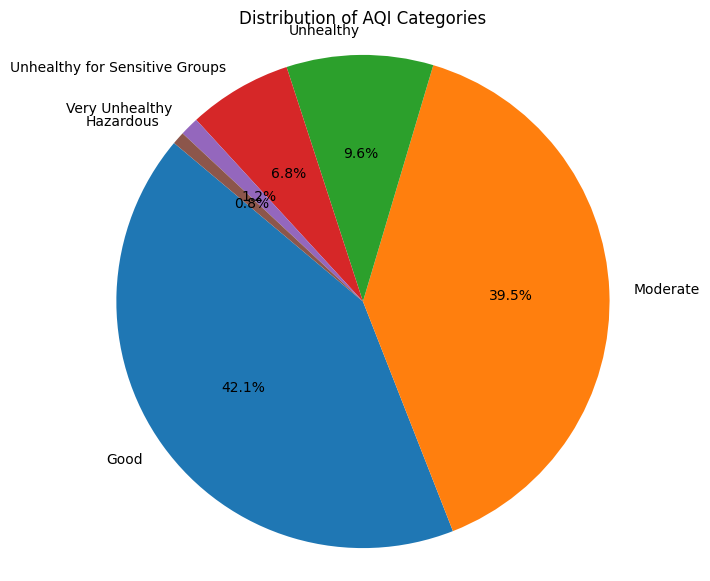

In [ ]:
aqi_counts = df['AQI Category'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AQI Categories')
plt.axis('equal')
plt.show()

**Insight:**  
The pie chart reveals the proportion of cities falling under various AQI categories. A large portion falls into the "Moderate" and "Unhealthy for Sensitive Groups" ranges, suggesting that while extreme pollution is less common, many regions still face significant air quality concerns. Public health policies should target the moderate zones to prevent worsening.


### Step 11: Top 10 Countries by Average AQI

This visualization highlights which countries have the highest overall air pollution levels on average.

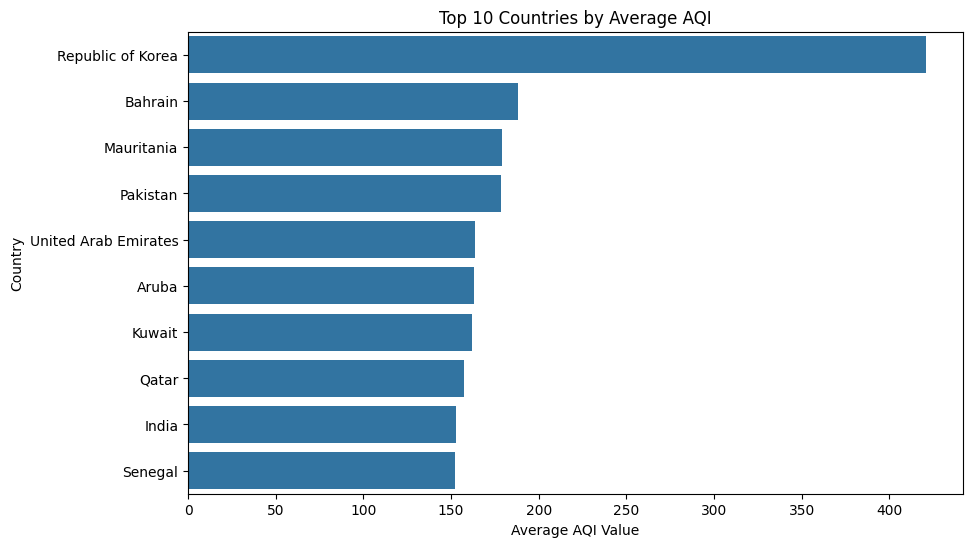

In [ ]:
top_countries = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Average AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.show()

**Insight:**  
This bar chart identifies countries with the highest average AQI levels. Countries like India and China dominate the top positions, indicating severe and persistent air quality challenges. These results align with known hotspots for industrial pollution and dense urbanization.


### Step 12: CO vs PM2.5 Scatterplot

We investigate the potential relationship between carbon monoxide and particulate matter levels.

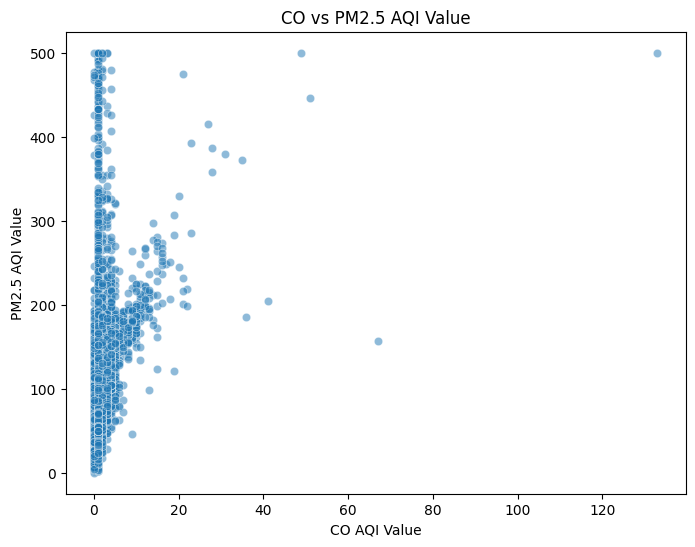

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CO AQI Value', y='PM2.5 AQI Value', alpha=0.5)
plt.title('CO vs PM2.5 AQI Value')
plt.xlabel('CO AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

**Insight:**  
There is a visible positive correlation between CO and PM2.5 AQI values. This suggests that cities with high carbon monoxide levels also tend to have higher particulate matter levels, which may originate from shared sources like vehicle emissions and industrial activity.


### Step 13: Heatmap of Pollutant Correlations

We visualize correlations among pollutant AQI values to identify strong positive or negative associations.

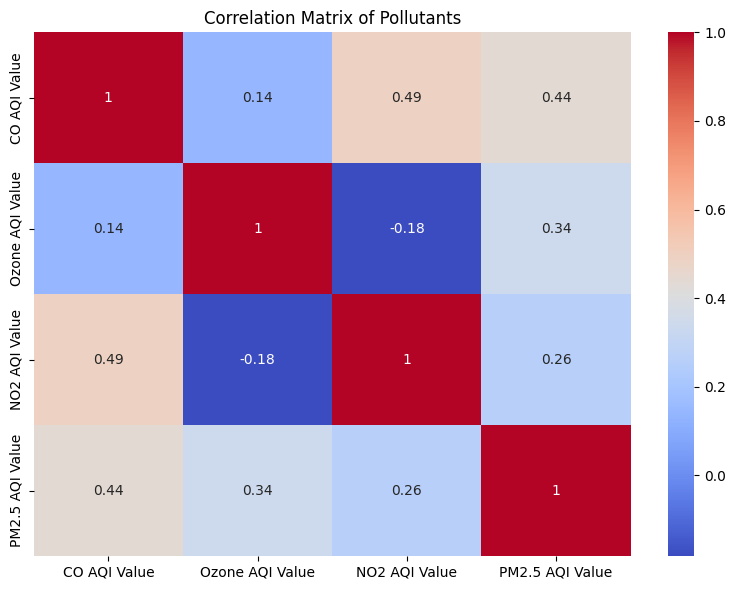

In [ ]:
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

**Insight:**  
The heatmap shows strong correlations between certain pollutants. For example, PM2.5 and NO2 often show moderate to strong positive correlation, indicating they may co-occur in traffic-dense environments. Understanding these relationships is key to implementing efficient multi-pollutant control strategies.


## 🔍 Key Takeaways

1. **Air Quality is a Global Concern:**
   - The dataset shows a wide distribution of AQI values across countries and cities, with many falling in the "Moderate" or "Unhealthy for Sensitive Groups" categories.
   - Only a small proportion of cities enjoy consistently "Good" air quality.

2. **Pollution Hotspots Identified:**
   - Countries like **India**, **China**, and **Pakistan** have some of the highest average AQI levels.
   - Urban centers like **Delhi**, **Lahore**, and **Beijing** emerge as consistent high-AQI cities.

3. **Particulate Matter (PM2.5) and CO Are Closely Linked:**
   - Scatterplots and correlation analysis reveal a strong relationship between **CO AQI** and **PM2.5 AQI**, suggesting that they often originate from common sources (e.g., vehicular and industrial emissions).

4. **Multi-Pollutant Correlation Insights:**
   - The heatmap reveals that several pollutants (like NO₂ and PM2.5) are significantly correlated, hinting at underlying systemic pollution patterns in urban environments.

5. **Policy Implications:**
   - The data supports the need for region-specific air quality interventions.
   - Medium-AQI zones represent critical transition zones where timely action can prevent further deterioration.

6. **Data Gaps Noted:**
   - Some cities lack coordinate data or have missing pollutant values. These should be treated or excluded during dashboard visualisation to ensure clarity.

This exploratory analysis lays the foundation for building an effective interactive dashboard that not only visualises but also communicates air quality patterns and insights to policymakers and the public.
